In [2]:
import numpy as np

In [25]:
class_dist = np.random.dirichlet(alpha=[5 for _ in range(10)], size=10)

<BarContainer object of 10 artists>

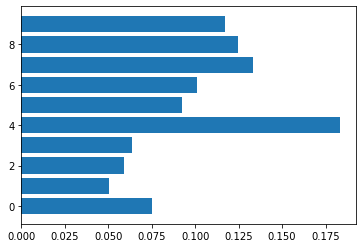

In [26]:
import matplotlib.pyplot as plt
plt.barh(range(10), class_dist[0])

In [103]:
import numpy as np

def cifar_sampling(dataset, num_users, num_items, alpha):
    labels = dataset.targets
    
    # Collect idxs for each label
    idxs_labels = {i: set() for i in range(10)}
    for idx, label in enumerate(labels):
        idxs_labels[label].add(idx)
    

    # 10 labels
    class_dist = np.random.dirichlet(alpha=[alpha for _ in range(10)], size=num_users)
    class_dist = (class_dist * num_items).astype(int)

    for _class, class_num in enumerate(class_dist.T.sum(axis=1)):
        assert class_num < len(idxs_labels[_class]), "num_items must be smaller"
    
    
    dict_users = {i: set() for i in range(num_users)}
    dists = {i: [0 for j in range(10)] for i in range(num_users)}
    
    for client_id, client_dist in enumerate(class_dist):
        for _class, num in enumerate(client_dist):
            sample_idxs = idxs_labels[_class]
            dists[client_id][_class] += num
            
            sampled_idxs = set(np.random.choice(list(sample_idxs), size=num, replace=False)) 
            # accumulate
            dict_users[client_id].update(sampled_idxs)
            
            # exclude assigned idxs
            idxs_labels[_class] = sample_idxs - sampled_idxs
            
    for i, data_idxs in dict_users.items():
        dict_users[i] = list(data_idxs)
    

    
    for client_id, dist in dists.items():
        plt.figure(client_id)
        plt.xlabel("class")
        plt.ylabel("num items")
        plt.bar(range(10), dist, label=client_id)
        plt.show()
    
    
    return dict_users
    
    

In [104]:
from torchvision import datasets, transforms
test_dataset = datasets.CIFAR10(
                "./data/cifar",
                train=False, 
                download=True
            )

Files already downloaded and verified


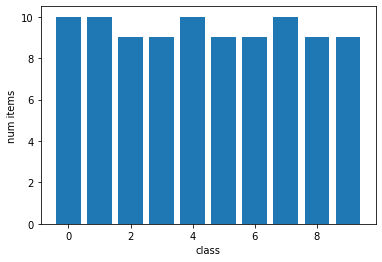

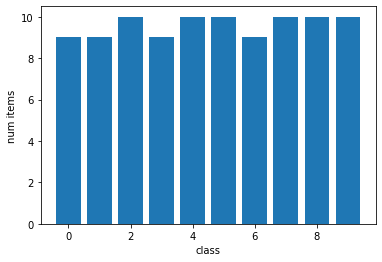

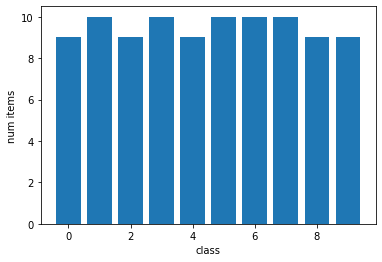

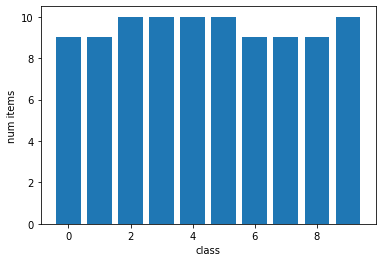

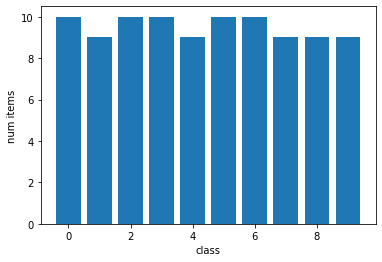

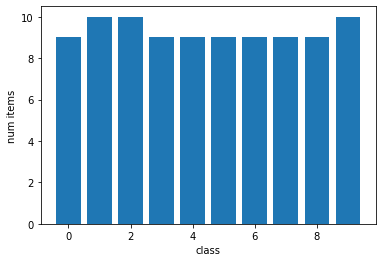

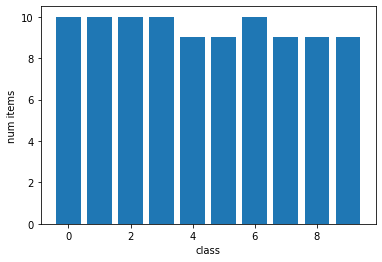

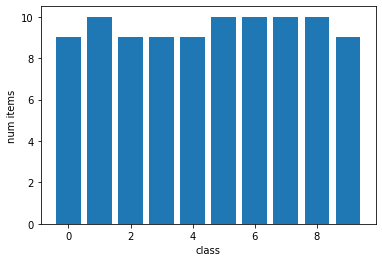

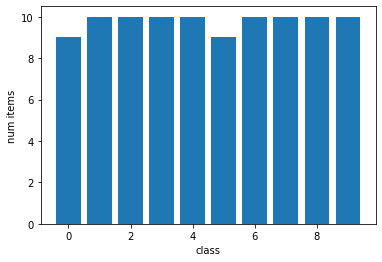

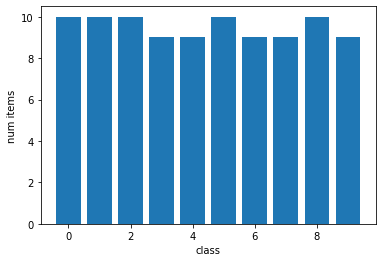

{0: [5376,
  772,
  3334,
  3590,
  2057,
  2570,
  5645,
  9742,
  3855,
  5653,
  5401,
  1050,
  2333,
  6942,
  9769,
  8490,
  5419,
  7210,
  2604,
  5679,
  8243,
  308,
  6708,
  5174,
  6716,
  7748,
  9796,
  4679,
  4945,
  7508,
  8280,
  7774,
  5471,
  4449,
  3683,
  9318,
  7782,
  8552,
  3178,
  363,
  5996,
  5740,
  621,
  116,
  1908,
  3448,
  633,
  4474,
  2171,
  1404,
  7549,
  3710,
  4479,
  9602,
  5507,
  3970,
  644,
  2950,
  650,
  6797,
  8849,
  8850,
  915,
  3990,
  3479,
  9112,
  2206,
  1441,
  2210,
  9897,
  1966,
  4021,
  6333,
  2238,
  5314,
  7109,
  1993,
  4302,
  4046,
  6095,
  5841,
  2005,
  6878,
  6623,
  4328,
  5096,
  6125,
  5103,
  4080,
  3313,
  242,
  3060,
  4600,
  9978],
 1: [3,
  7683,
  7173,
  1284,
  6665,
  265,
  8203,
  9999,
  9491,
  2070,
  4631,
  8729,
  3868,
  7709,
  7454,
  2593,
  6946,
  7973,
  3113,
  2347,
  9270,
  9019,
  6971,
  7998,
  6206,
  4929,
  9282,
  577,
  6214,
  5958,
  8008,
  8780,


In [110]:
cifar_noniid(test_dataset, 10, 100, 10000)

In [38]:
t=np.array([[1,2,3],[4,5,6]])

In [39]:
t.sum(axis=1)

array([ 6, 15])